In [1]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt

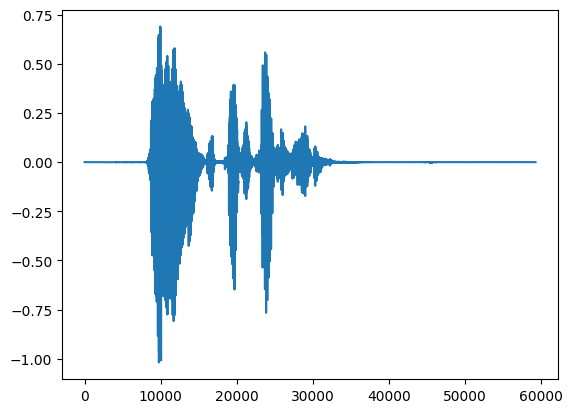

In [2]:
y,sr = librosa.load('ai in speech processing.wav')
plt.plot(y)

In [3]:
import numpy as np
fft = np.fft.fft(y)

In [4]:
amp_spec = np.abs(fft)

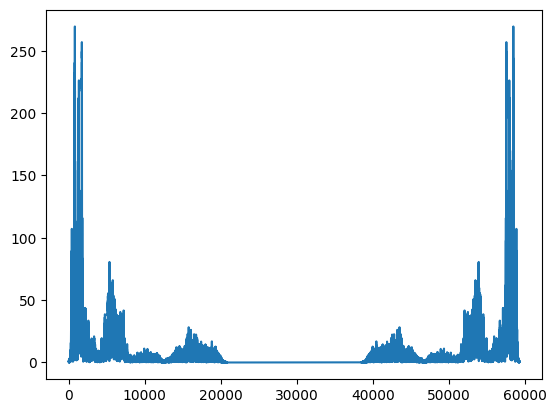

In [5]:
plt.plot(amp_spec)

c:\Users\V.HEMANT KUMAR REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


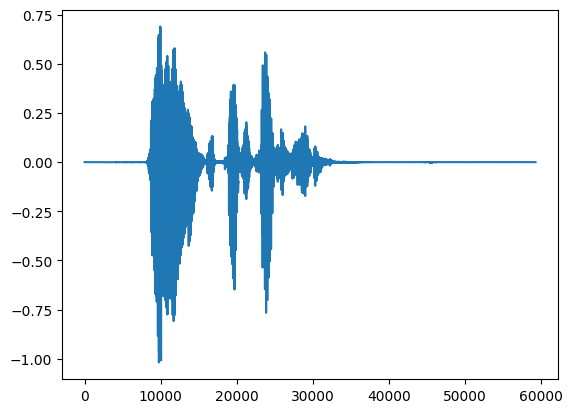

In [6]:
ifft = np.fft.ifft(fft)
plt.plot(ifft)

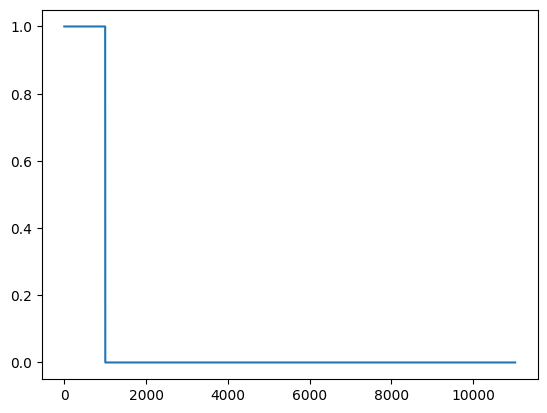

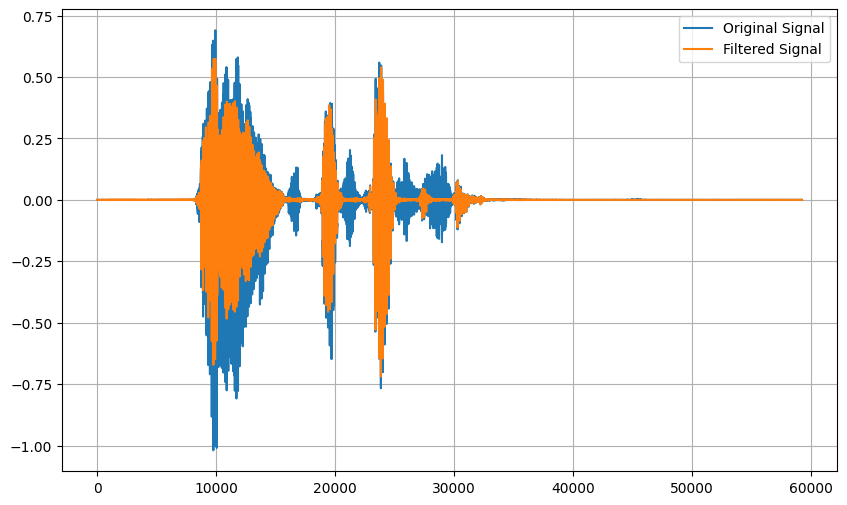

In [7]:
def rect_wind(sl, low_pass, fs):
    n = len(sl)
    freq = np.fft.rfftfreq(n, d=1/fs)
    mask = np.abs(freq) <= low_pass
    plt.plot(freq,mask) 
    y_low = np.fft.irfft(np.fft.rfft(sl) * mask, n) 
    return y_low

low_pass = 1000
y_low = rect_wind(y, low_pass, sr)
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(y_low, label='Filtered Signal')
plt.legend()
plt.grid()
plt.show()

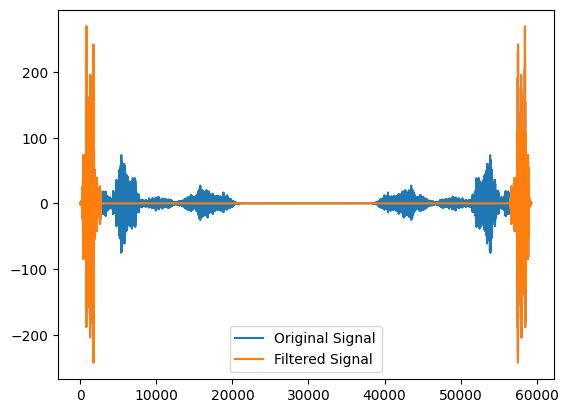

In [8]:
plt.plot(np.fft.fft(y).real,label='Original Signal')
plt.plot(np.fft.fft(y_low).real,label='Filtered Signal')
plt.legend()

In [11]:
Audio(y_low,rate=sr)

(29636,)
[False False False ... False False False]


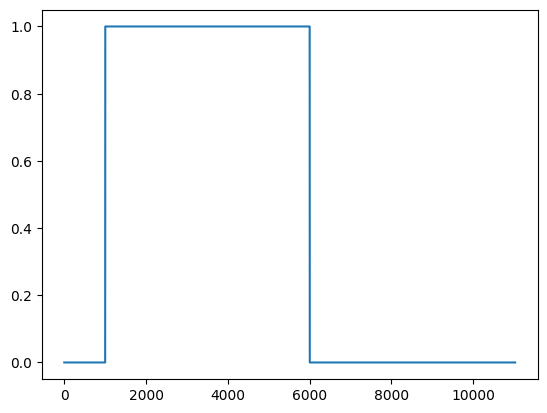

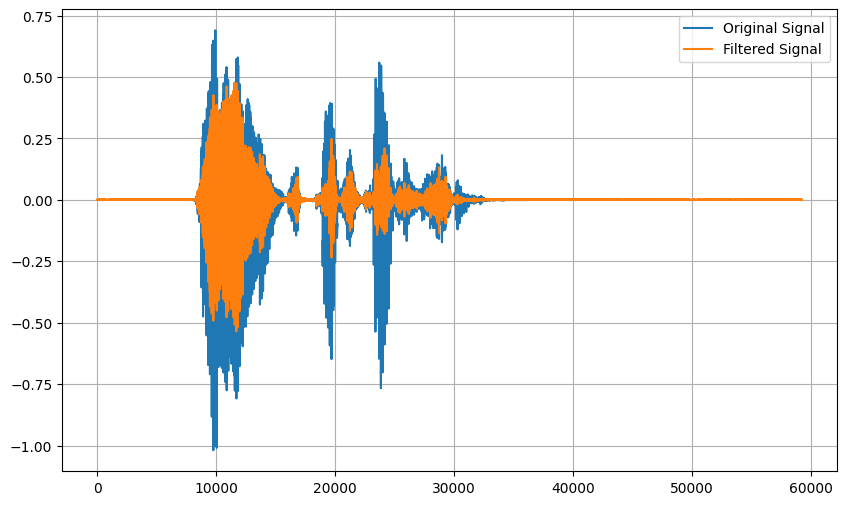

In [12]:
def rect_wind(sl, low_pass, high_pass, fs):
    n = len(sl)
    freq = np.fft.rfftfreq(n, d=1/fs) 
    mask = (np.abs(freq) >= low_pass) & (np.abs(freq) <= high_pass)
    plt.plot(freq,mask)
    print(mask.shape)
    print(mask)
    y_band = np.fft.irfft(np.fft.rfft(sl) * mask, n)  
    return y_band

low_pass = 1000 
high_pass = 6000
y_band = rect_wind(y, low_pass, high_pass, sr)
plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(y_band, label='Filtered Signal')
plt.legend()
plt.grid()
plt.show()

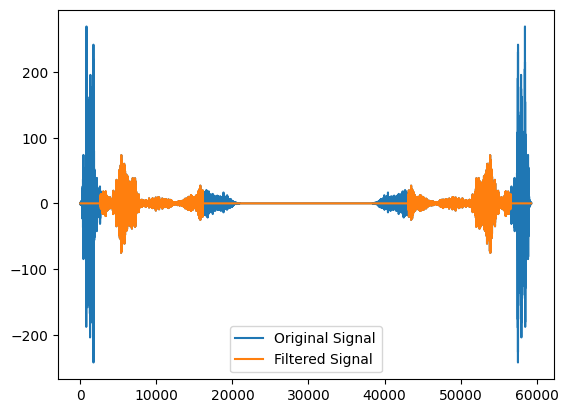

In [13]:
plt.plot(np.fft.fft(y).real,label='Original Signal')
plt.plot(np.fft.fft(y_band).real,label='Filtered Signal')
plt.legend()

In [14]:
Audio(y_band,rate=sr)

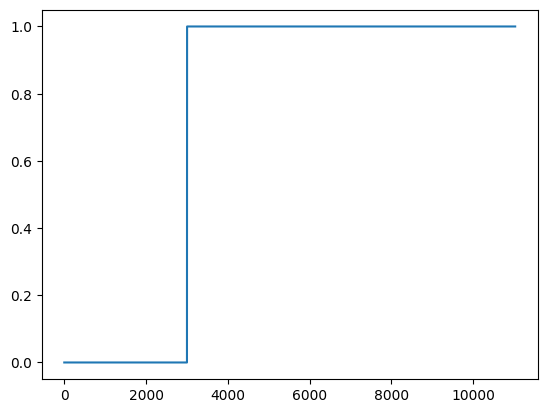

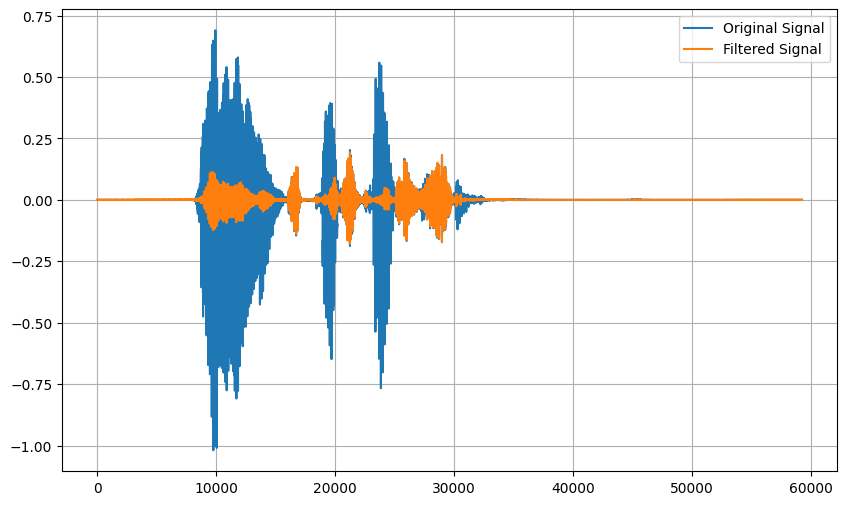

In [15]:
def rectangular_window(sl, high_pass, fs):
    n = len(sl)
    freq = np.fft.rfftfreq(n, d=1/fs)  
    mask = np.abs(freq) >= high_pass  
    plt.plot(freq,mask)
    filtered_signal = np.fft.irfft(np.fft.rfft(sl) * mask, n)  
    return filtered_signal

high_pass = 3000  
y_high = rectangular_window(y, high_pass, sr)

plt.figure(figsize=(10, 6))
plt.plot(y, label='Original Signal')
plt.plot(y_high, label='Filtered Signal')
plt.legend()
plt.grid()
plt.show()

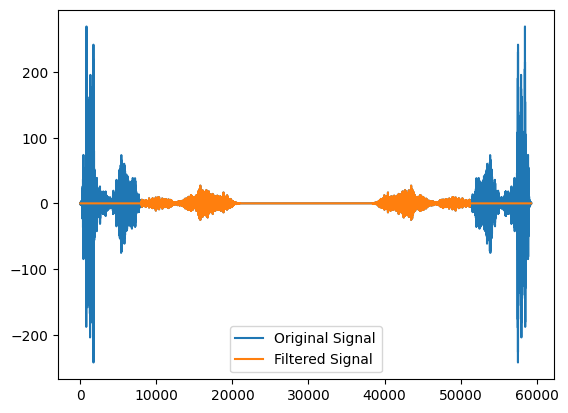

In [16]:
plt.plot(np.fft.fft(y).real,label='Original Signal')
plt.plot(np.fft.fft(y_high).real,label='Filtered Signal')
plt.legend()

In [17]:
Audio(y_high,rate = sr)

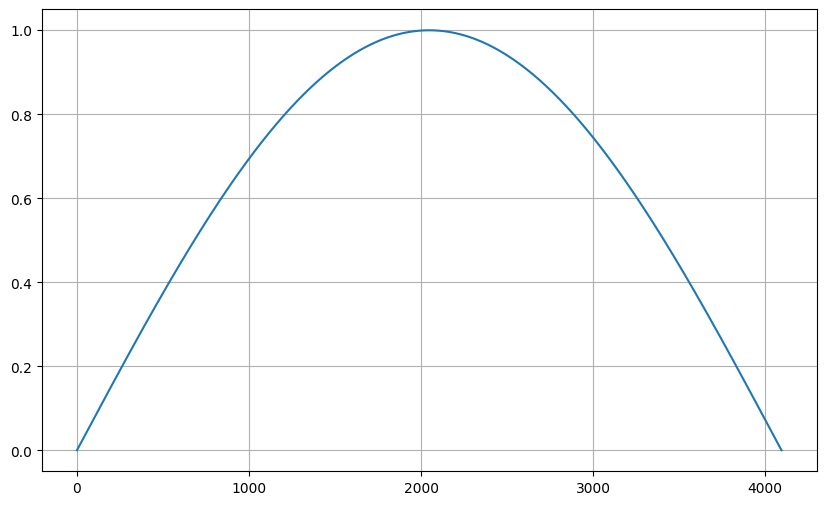

In [18]:
from scipy.signal import cosine

cut_freq = 1000  
win_size = 4096
cosine_filter = cosine(win_size, np.pi * cut_freq)
plt.figure(figsize=(10, 6))
plt.plot(cosine_filter)
plt.grid()
plt.show()


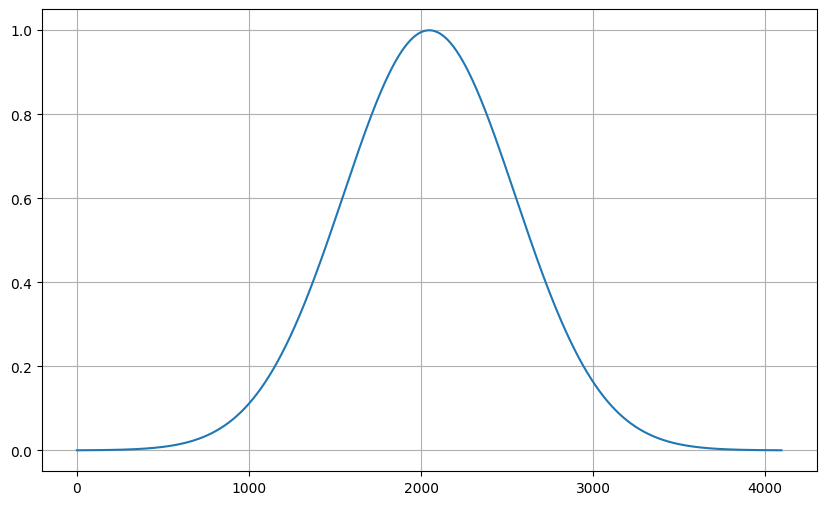

In [19]:
from scipy.signal import gaussian
std_dev = 500  
gaussian_filter = gaussian(win_size, std=std_dev)

plt.figure(figsize=(10, 6))
plt.plot(gaussian_filter)
plt.grid()
plt.show()

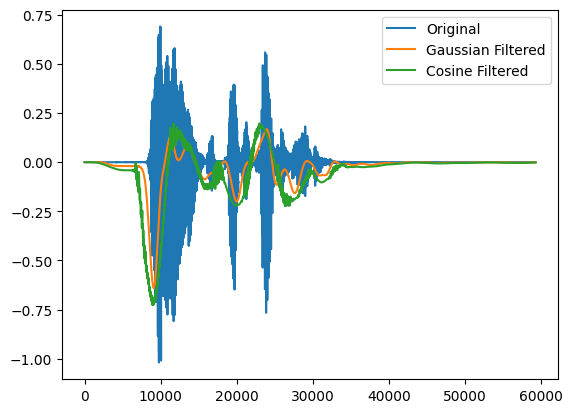

In [20]:
from scipy.signal import convolve

y_cos = convolve(y, cosine_filter, mode='same')
y_gaussian = convolve(y, gaussian_filter, mode='same')
plt.plot(y,label="Original")
plt.plot(y_gaussian, label='Gaussian Filtered')
plt.plot(y_cos, label='Cosine Filtered')
plt.legend()

In [21]:
Audio(y_cos,rate=sr)

In [22]:
Audio(y_gaussian,rate=sr)